# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 593
['wailua homesteads', 'grytviken', 'vila velha', 'zwedru', 'bilibino', 'sal rei', 'rongelap', 'campo grande', 'albany', 'okha', "port saint john's", 'tura', 'palmas', 'invercargill', 'west island', 'tralee', 'byron bay', 'remire-montjoly', 'port elizabeth', 'tazovsky', 'vilyuysk', "al jahra'", 'karratha', 'dudinka', 'adamstown', 'ushuaia', 'yinzhu', 'badger', 'luderitz', 'sitka', 'hadibu', 'bati', 'saipan', 'taiohae', 'jamestown', 'rockland', 'waitangi', 'whitehorse', 'el calafate', 'prince rupert', 'al burayqah', 'stanley', 'ust-nera', 'iqaluit', 'manokwari', 'lorengau', 'port-aux-francais', 'khandyga', 'holualoa', 'dinard', 'kodiak', 'bomadi', 'coquimbo', "priob'ye", 'port lincoln', 'nabire', 'sao joao da barra', 'pskov', 'fortuna', 'petropavlovsk-kamchatsky', 'piti village', 'bethel', 'edinburgh of the seven seas', 'kolonia town', 'caiaponia', 'ribeira grande', 'isafjordur', 'antalaha', 'alo', 'lampang', 'college', 'island harbour', 'margaret river'

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [19]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
#print("Beginning Data Retrieval     ")
#print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city + "&appid=" + weather_api_key 
    #print(city_url)
    # Log the url, record, and set numbers
    #print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1
    #print(city_url)
    response = requests.get(city_url)
    city_weather = response.json()
    #pprint(city_weather)

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url)
        city_weather = response.json()
        #pprint(city_weather)

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
-----------------------------
Data Retrieval Complete      
-----------------------------


In [65]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()


City          562
Lat           562
Lng           562
Max Temp      562
Humidity      562
Cloudiness    562
Wind Speed    562
Country       562
Date          562
dtype: int64

In [66]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,wailua homesteads,22.0669,-159.3780,299.12,77,40,6.17,US,1686772923
1,grytviken,-54.2811,-36.5092,270.20,82,45,2.98,GS,1686772758
2,vila velha,-20.3297,-40.2925,299.12,81,20,5.66,BR,1686772730
3,zwedru,6.0667,-8.1281,296.09,92,97,1.61,LR,1686772924
4,bilibino,68.0546,166.4372,275.59,58,93,1.28,RU,1686772925


In [67]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [68]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,wailua homesteads,22.0669,-159.3780,299.12,77,40,6.17,US,1686772923
1,grytviken,-54.2811,-36.5092,270.20,82,45,2.98,GS,1686772758
2,vila velha,-20.3297,-40.2925,299.12,81,20,5.66,BR,1686772730
3,zwedru,6.0667,-8.1281,296.09,92,97,1.61,LR,1686772924
4,bilibino,68.0546,166.4372,275.59,58,93,1.28,RU,1686772925


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

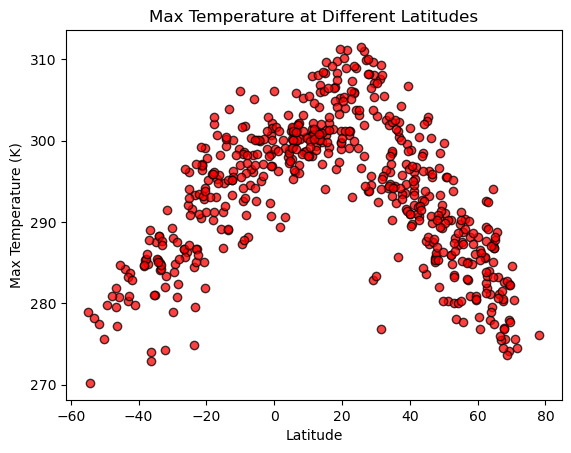

In [69]:
# Build scatter plot for latitude vs. temperature

plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], marker="o", facecolors="red", edgecolors="black",
            alpha=0.75)

# Incorporate the other graph properties
plt.title("Max Temperature at Different Latitudes")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (K)")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

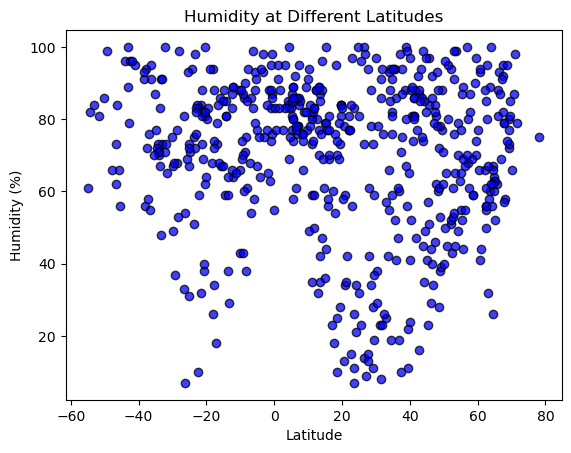

In [70]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], marker="o", facecolors="blue", edgecolors="black",
            alpha=0.75)

# Incorporate the other graph properties
plt.title("Humidity at Different Latitudes")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

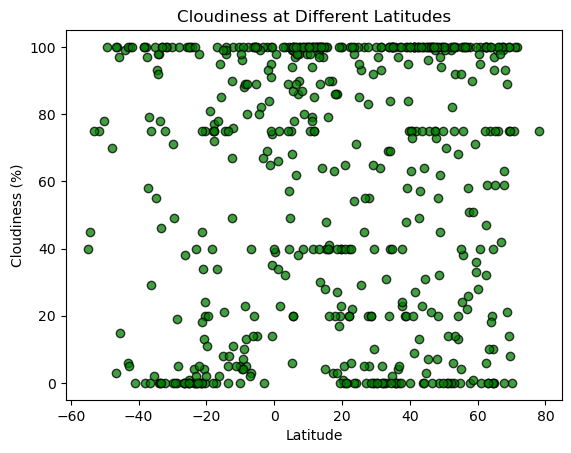

In [71]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], marker="o", facecolors="green", edgecolors="black",
            alpha=0.75)

# Incorporate the other graph properties
plt.title("Cloudiness at Different Latitudes")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

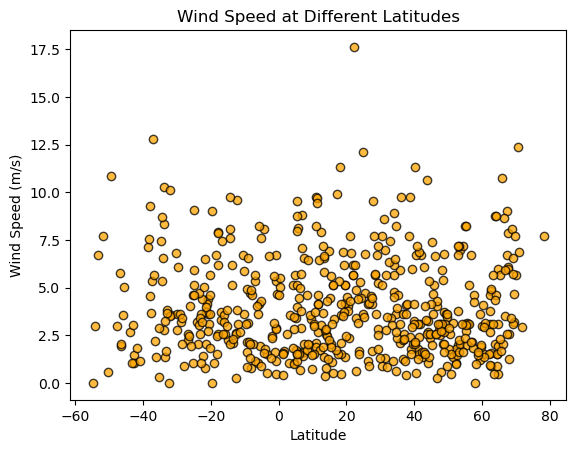

In [72]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], marker="o", facecolors="orange", edgecolors="black",
            alpha=0.75)

# Incorporate the other graph properties
plt.title("Wind Speed at Different Latitudes")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [73]:
# Define a function to create Linear Regression plots

In [74]:
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,wailua homesteads,22.0669,-159.3780,299.12,77,40,6.17,US,1686772923
1,grytviken,-54.2811,-36.5092,270.20,82,45,2.98,GS,1686772758
2,vila velha,-20.3297,-40.2925,299.12,81,20,5.66,BR,1686772730
3,zwedru,6.0667,-8.1281,296.09,92,97,1.61,LR,1686772924
4,bilibino,68.0546,166.4372,275.59,58,93,1.28,RU,1686772925


In [75]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]


# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,wailua homesteads,22.0669,-159.3780,299.12,77,40,6.17,US,1686772923
3,zwedru,6.0667,-8.1281,296.09,92,97,1.61,LR,1686772924
4,bilibino,68.0546,166.4372,275.59,58,93,1.28,RU,1686772925
5,sal rei,16.1833,-22.9167,299.26,69,40,5.14,CV,1686772925
6,rongelap,11.1635,166.8941,300.84,81,79,9.73,MH,1686772926


In [76]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,grytviken,-54.2811,-36.5092,270.20,82,45,2.98,GS,1686772758
2,vila velha,-20.3297,-40.2925,299.12,81,20,5.66,BR,1686772730
7,campo grande,-20.4428,-54.6464,281.90,100,75,3.09,BR,1686772641
10,port saint john's,-31.6229,29.5448,291.50,65,100,3.58,ZA,1686772928
12,palmas,-10.2128,-48.3603,306.08,43,0,3.60,BR,1686772726


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.6004184687795757


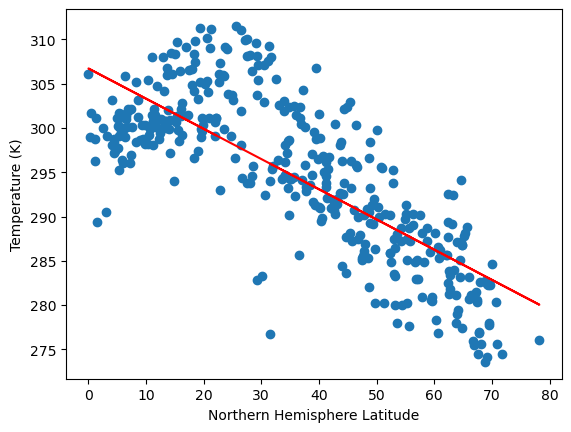

In [77]:
# Linear regression on Northern Hemisphere
x_value_n = northern_hemi_df['Lat']
y_value_n = northern_hemi_df['Max Temp']
(ntemp_slope, ntemp_intercept, ntemp_rvalue, ntemp_pvalue, ntemp_stderr) = linregress(x_value_n, y_value_n)

# Get regression values
regress_values_n = x_value_n * ntemp_slope + ntemp_intercept

# Create line equation string
line_eq = "y = " + str(round(ntemp_slope,2)) + "x +" + str(round(ntemp_intercept,2))

# Create Plot
plt.scatter(x_value_n, y_value_n)
plt.plot(x_value_n,regress_values_n,"r-")

# Label plot and annotate the line equation
plt.xlabel('Northern Hemisphere Latitude')
plt.ylabel('Temperature (K)')
plt.annotate(line_eq,(20,5),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {ntemp_rvalue**2}")

# Show plot
plt.show()

The r-value is: 0.6455881906977349


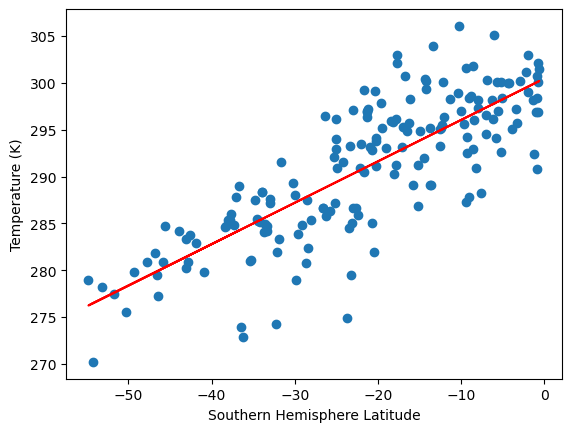

In [78]:
# Linear regression on Southern Hemisphere
x_value_s = southern_hemi_df['Lat']
y_value_s = southern_hemi_df['Max Temp']
(stemp_slope, stemp_intercept, stemp_rvalue, stemp_pvalue, stemp_stderr) = linregress(x_value_s, y_value_s)

# Get regression values
regress_values_s = x_value_s * stemp_slope + stemp_intercept

# Create line equation string
line_eq = "y = " + str(round(stemp_slope,2)) + "x +" + str(round(stemp_intercept,2))

# Create Plot
plt.scatter(x_value_s, y_value_s)
plt.plot(x_value_s,regress_values_s,"r-")

# Label plot and annotate the line equation
plt.xlabel('Southern Hemisphere Latitude')
plt.ylabel('Temperature (K)')
plt.annotate(line_eq,(20,5),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {stemp_rvalue**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:** A correlation coefficient of 0.6004184687795757 between the latitude of cities in the northern hemisphere and the temperature indicates a moderate positive linear relationship between these two variables.

In this context, it suggests that as you move further north (increasing latitude) in the northern hemisphere, there is a tendency for the temperature to decrease, although the relationship is not perfectly linear. The positive sign of the correlation coefficient indicates that as latitude increases, temperature generally tends to decrease.

A r-value of 0.6455881906977349 between the latitude of cities in the southern hemisphere and the temperature indicates a moderate positive linear relationship between these two variables.

In this case, it suggests that as you move further south (increasing latitude) in the southern hemisphere, there is a tendency for the temperature to decrease, although the relationship is not perfectly linear. The positive sign of the correlation coefficient indicates that as latitude increases, temperature generally tends to decrease.

However, it is important to note that correlation does not imply causation. The correlation coefficient only quantifies the strength and direction of the linear relationship between the variables; it does not indicate a cause-and-effect relationship. Other factors such as altitude, ocean currents, local geography, and seasonal variations can also influence temperature, so it is essential to consider these factors when interpreting the relationship between latitude and temperature.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.0004999014730169182


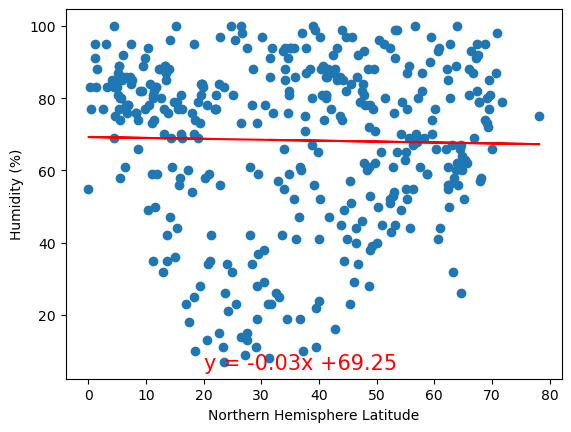

In [79]:
# Northern Hemisphere
y_value_n = northern_hemi_df['Humidity']
(nhum_slope, nhum_intercept, nhum_rvalue, nhum_pvalue, nhum_stderr) = linregress(x_value_n, y_value_n)

# Get regression values
regress_values_n = x_value_n * nhum_slope + nhum_intercept

# Create line equation string
line_eq = "y = " + str(round(nhum_slope,2)) + "x +" + str(round(nhum_intercept,2))

# Create Plot
plt.scatter(x_value_n, y_value_n)
plt.plot(x_value_n,regress_values_n,"r-")

# Label plot and annotate the line equation
plt.xlabel('Northern Hemisphere Latitude')
plt.ylabel('Humidity (%)')
plt.annotate(line_eq,(20,5),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {nhum_rvalue**2}")

# Show plot
plt.show()

The r-value is: 1.9089548549167776e-05


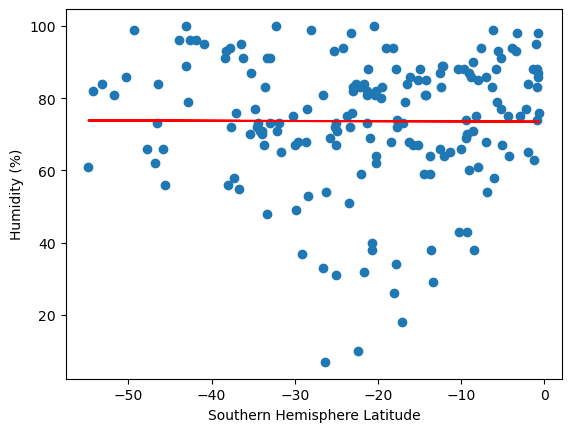

In [80]:
# Southern Hemisphere
y_value_s = southern_hemi_df['Humidity']
(shum_slope, shum_intercept, shum_rvalue, shum_pvalue, shum_stderr) = linregress(x_value_s, y_value_s)

# Get regression values
regress_values_s = x_value_s * shum_slope + shum_intercept

# Create line equation string
line_eq = "y = " + str(round(shum_slope,2)) + "x +" + str(round(shum_intercept,2))

# Create Plot
plt.scatter(x_value_s, y_value_s)
plt.plot(x_value_s,regress_values_s,"r-")

# Label plot and annotate the line equation
plt.xlabel('Southern Hemisphere Latitude')
plt.ylabel('Humidity (%)')
plt.annotate(line_eq,(20,5),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {shum_rvalue**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:** The r-value of both hemispheres are very trivial, with 0.0004999014730169182 from the Northern Hemispphere and 1.9089548549167776e-05 in the Southern. This indicate that there is almost no linear relationship between the latitudes of cities in either hemispheres and the Humidity. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.007036917368142498


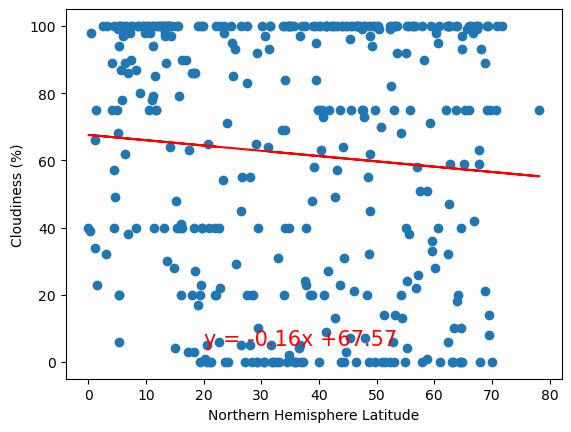

In [81]:
# Northern Hemisphere
y_value_n = northern_hemi_df["Cloudiness"]
(ncloud_slope, ncloud_intercept, ncloud_rvalue, ncloud_pvalue, ncloud_stderr) = linregress(x_value_n, y_value_n)

# Get regression values
regress_values_n = x_value_n * ncloud_slope + ncloud_intercept

# Create line equation string
line_eq = "y = " + str(round(ncloud_slope,2)) + "x +" + str(round(ncloud_intercept,2))

# Create Plot
plt.scatter(x_value_n, y_value_n)
plt.plot(x_value_n,regress_values_n,"r-")

# Label plot and annotate the line equation
plt.xlabel('Northern Hemisphere Latitude')
plt.ylabel('Cloudiness (%)')
plt.annotate(line_eq,(20,5),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {ncloud_rvalue**2}")

# Show plot
plt.show()

The r-value is: 0.0003742785002175707


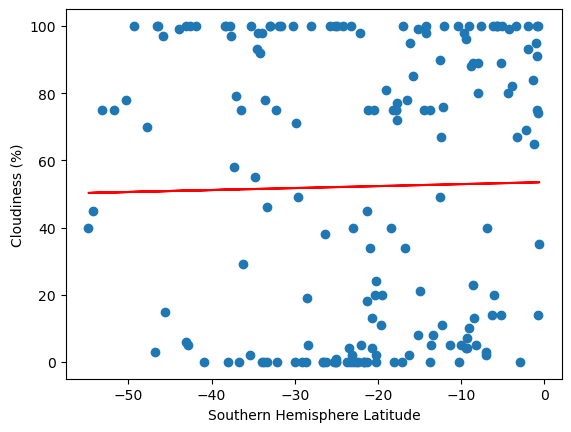

In [82]:
# Southern Hemisphere
y_value_s = southern_hemi_df["Cloudiness"]
(scloud_slope, scloud_intercept, scloud_rvalue, scloud_pvalue, scloud_stderr) = linregress(x_value_s, y_value_s)

# Get regression values
regress_values_s = x_value_s * scloud_slope + scloud_intercept

# Create line equation string
line_eq = "y = " + str(round(scloud_slope,2)) + "x +" + str(round(scloud_intercept,2))

# Create Plot
plt.scatter(x_value_s, y_value_s)
plt.plot(x_value_s,regress_values_s,"r-")

# Label plot and annotate the line equation
plt.xlabel('Southern Hemisphere Latitude')
plt.ylabel('Cloudiness (%)')
plt.annotate(line_eq,(20,5),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {scloud_rvalue**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:** The r-value of both hemispheres are very trivial, with 0.007036917368142498 from the Northern Hemispphere and 0.0003742785002175707 in the Southern. This indicate that there is almost no linear relationship between the latitudes of cities in either hemispheres and the cloudiness. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.00015674028540313994


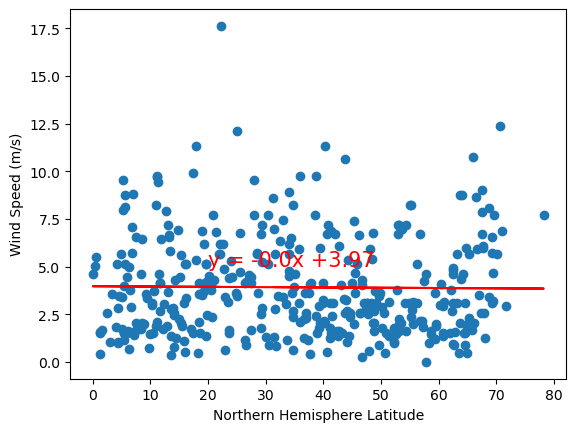

In [83]:
# Northern Hemisphere
y_value_n = northern_hemi_df['Wind Speed']
(nwind_slope, nwind_intercept, nwind_rvalue, nwind_pvalue, nwind_stderr) = linregress(x_value_n, y_value_n)


# Get regression values
regress_values_n = x_value_n * nwind_slope + nwind_intercept

# Create line equation string
line_eq = "y = " + str(round(nwind_slope,2)) + "x +" + str(round(nwind_intercept,2))

# Create Plot
plt.scatter(x_value_n, y_value_n)
plt.plot(x_value_n,regress_values_n,"r-")

# Label plot and annotate the line equation
plt.xlabel('Northern Hemisphere Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.annotate(line_eq,(20,5),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {nwind_rvalue**2}")

# Show plot
plt.show()

The r-value is: 0.008210390979546022


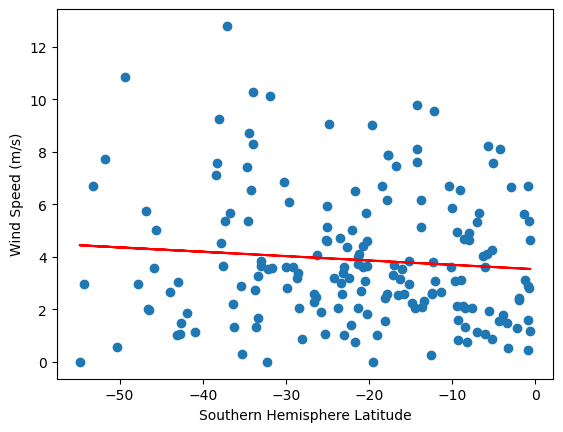

In [84]:
# Southern Hemisphere
y_value_s = southern_hemi_df['Wind Speed']
(swind_slope, swind_intercept, swind_rvalue, swind_pvalue, swind_stderr) = linregress(x_value_s, y_value_s)

# Get regression values
regress_values_s = x_value_s * swind_slope + swind_intercept

# Create line equation string
line_eq = "y = " + str(round(swind_slope,2)) + "x +" + str(round(swind_intercept,2))

# Create Plot
plt.scatter(x_value_s, y_value_s)
plt.plot(x_value_s,regress_values_s,"r-")

# Label plot and annotate the line equation
plt.xlabel('Southern Hemisphere Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.annotate(line_eq,(20,5),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {swind_rvalue**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:** 
A r-value of both hemispheres are very trivial, with 0.00015674028540313994 from the Northern Hemispphere and 0.008210390979546022 in the Southern. This indicate that there is almost no linear relationship between the latitudes of cities in the either hemispheres and wind speed. 